### Visualizing Extracted sentiments from Rapid Miner

Positives-[695, 288, 0, 2307, 377, 144], Neutrals-[393, 425, 1, 2234, 363, 5], Negatives-[148, 131, 0, 394, 115, 17]


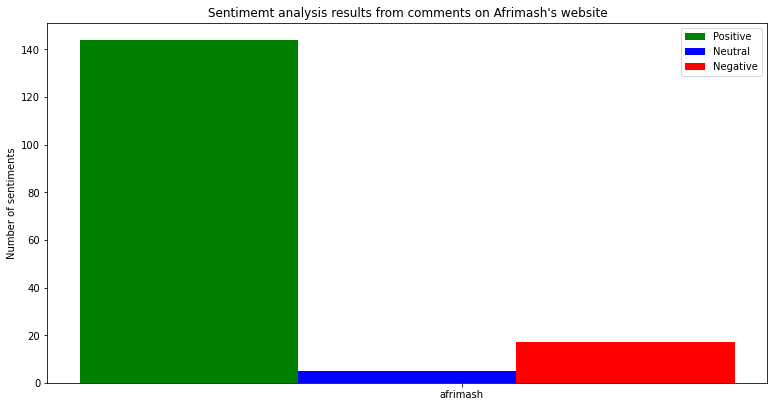

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10, 5)

#Define file paths
root_path = '../data_from_tools/sentiment_analysis/'
files = os.listdir(root_path)
file_paths = [root_path+file for file in files]

#Main
organizations = [file.replace('.csv', '') for file in files]

# X = np.arange(0, len(organizations)) #Define values for x axis
X = np.arange(0, 1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pt_list = [] #stores the list of positive sentiments for each organization
nt_list = [] #stores the list of neutral sentiments for each organization
ng_list = [] #stores the list of negative sentiments for each organization
for path, org in zip(file_paths, organizations):
    temp = pd.read_csv(path)
    sentiment = temp[['sentiment']]
    positives = temp[temp['sentiment'] > 0]
    neutrals = temp[temp['sentiment'] == 0]
    negatives = temp[temp['sentiment'] < 0]
    pt_list.append(len(positives))
    nt_list.append(len(neutrals))
    ng_list.append(len(negatives))

print("Positives-{}, Neutrals-{}, Negatives-{}".format(pt_list, nt_list, ng_list))
ax.set_xticks(X+0.25)
ax.set_xticklabels(organizations)
q = ax.bar(X, pt_list[-1], color = 'g', width = 0.2, label="Positive")
d = ax.bar(X + 0.2, nt_list[-1], color = 'b', width = 0.2, label="Neutral")
f = ax.bar(X + 0.4, ng_list[-1], color = 'r', width = 0.2, label="Negative")
ax.set_ylabel('Number of sentiments')
ax.set_title("Sentimemt analysis results from comments on Afrimash's website")
ax.legend()
plt.show()

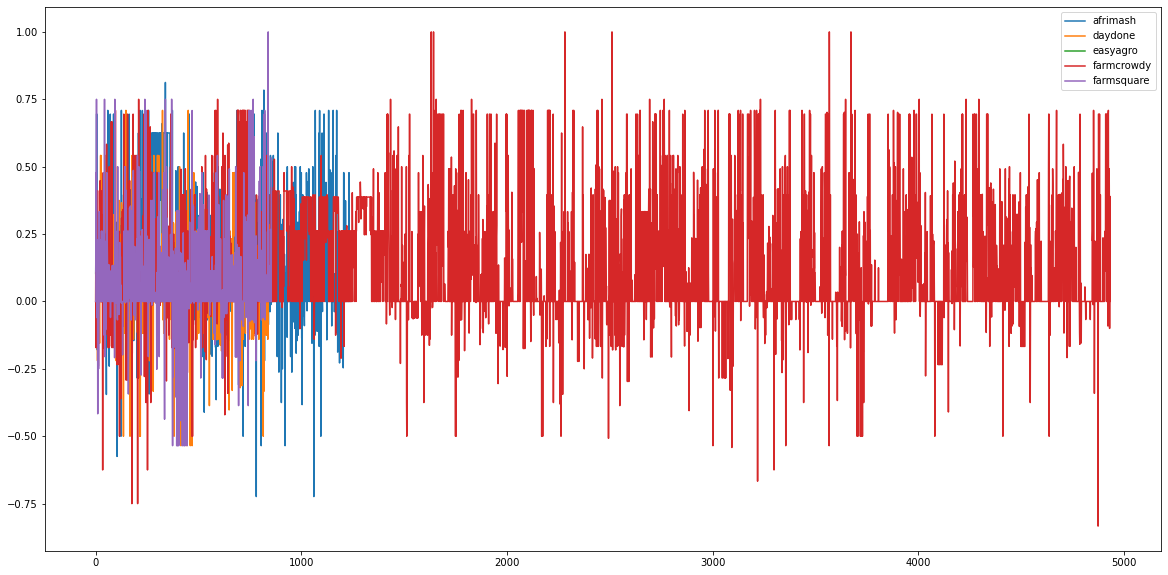

In [2]:
for path, org in zip(file_paths, organizations):
    temp = pd.read_csv(path)
    sentiment = temp[['sentiment']]
    plt.plot(sentiment, label=org)
plt.legend()

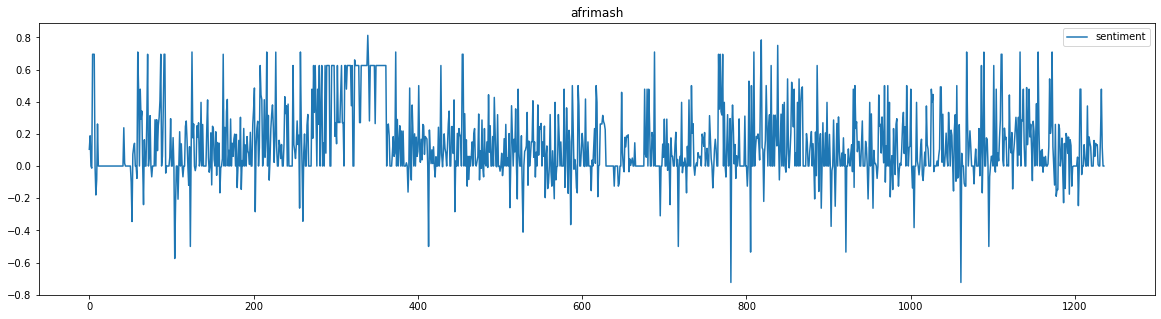

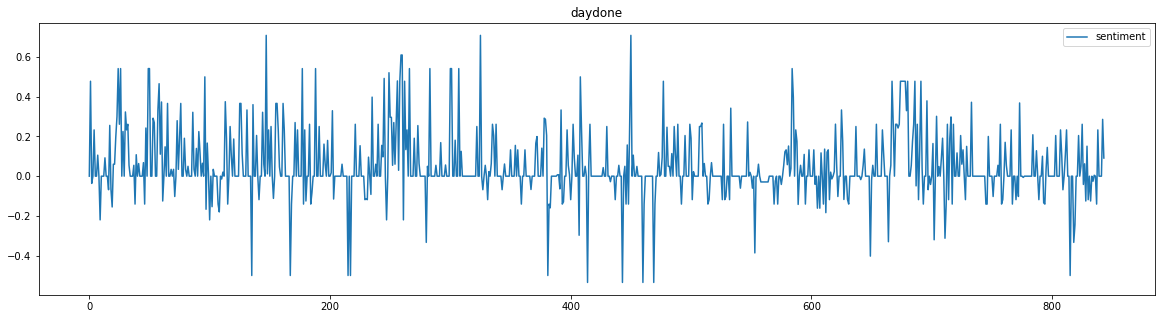

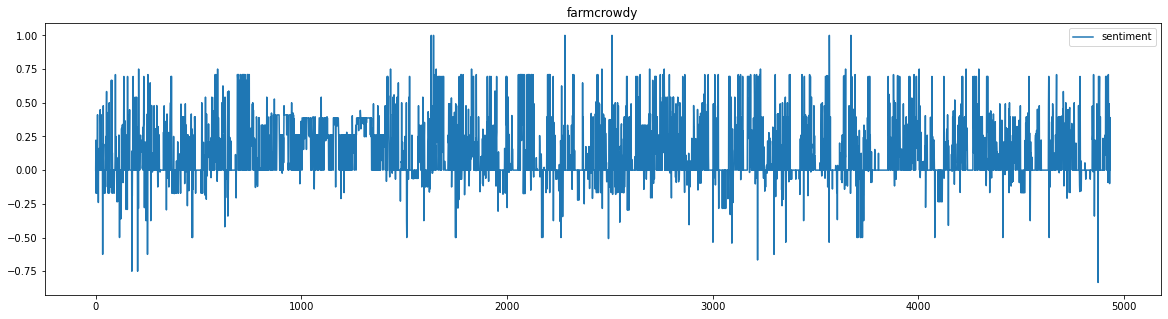

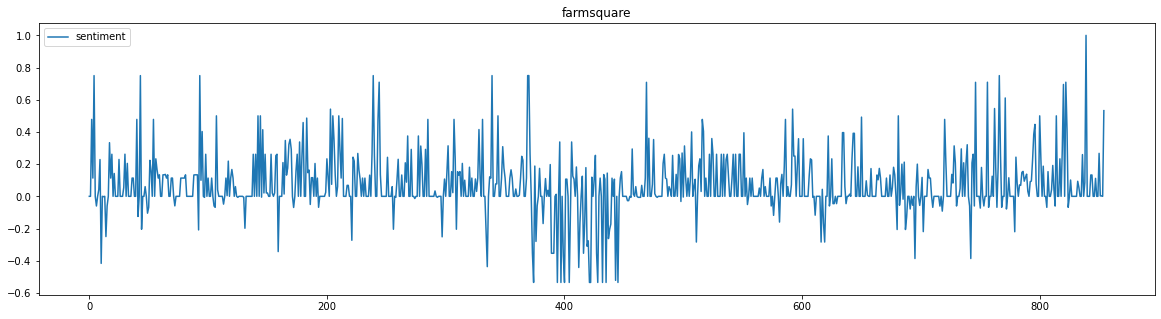

In [3]:
#VISUALIZING THE SENTIMENT OF EACH ORGANIZATION
temp_list = []
for path, org in zip(file_paths, organizations):
    temp = pd.read_csv(path)
    temp_list.append(temp[['sentiment']])

for df, org in zip(temp_list, organizations):
    if len(df) > 2:
        df.plot.line(figsize=(20,5), title=org)
    
# lengths = [len(df) for df in temp_list]
# max_len = max(lengths)
# max_idx = lengths.index(max_len)

# all_sentiments = pd.DataFrame()
# all_sentiments[organizations[max_idx]] = temp_list[max_idx]['sentiment']
# for path, org in zip(file_paths, organizations):
#     temp = pd.read_csv(path)
#     if len(temp) != max_len:
#         all_sentiments[org] = temp['sentiment']
# print(all_sentiments)
# all_sentiments.plot.line(subplots=True, figsize=(20,30))

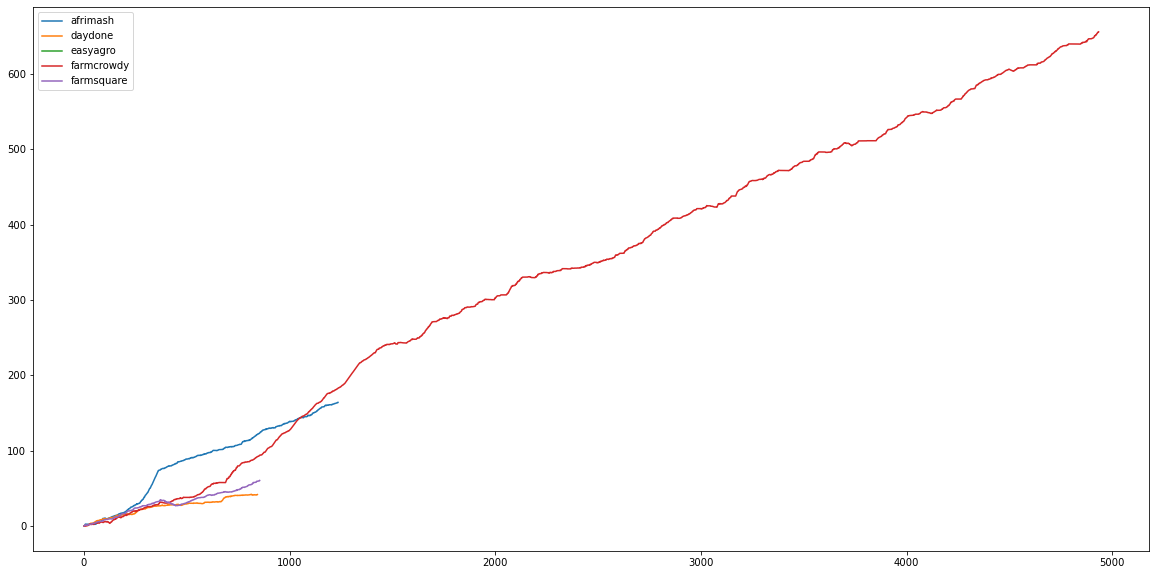

In [4]:
#PLOTTING THE AGGREGATE OF SENTIMENTS IN ORDER TO IDENTIFY TRENDS
for path, org in zip(file_paths, organizations):
    temp = pd.read_csv(path)
    sentiment = temp[['sentiment']]
    sentiment_list = sentiment['sentiment'].tolist()
    aggr_sent_list = []
    summ = 0
    for sent in sentiment_list:
        summ += sent
        aggr_sent_list.append(summ)
    plt.plot(aggr_sent_list, label=org)
#     break
plt.legend()

### Generating word cloud of Negative, Positive, and Neutral sentiments

In [9]:
afrimash = pd.read_csv(root_path+'afrimash.csv')
cols = afrimash.columns.tolist()
afrimash_sorted = afrimash.sort_values('sentiment').iloc[:10,:]
ngt_words = []
# print(afrimash_sorted)
for i in range(0, len(afrimash_sorted)):
    token_list = afrimash_sorted.iloc[i,:].tolist()
    negative_tokens = [token for token in token_list[1:] if token != 0]
    negative_tokens_index = [token_list.index(token) for token in negative_tokens]
    ngt_words += [cols[idx] for idx in negative_tokens_index]
#     break
for word in set(ngt_words):
    print('[', word, end='] / ')

[ order] / [ choose] / [ inconvenience] / [ using] / [ link] / [ king] / [ chicken] / [ cause] / [ apology] / [ turkey] / [ sorry] / [ sent] / [ hello] / [ buyer] / [ audio] / [ poor] / [ chick] / [ thank] / [ accessible] / [ place] / [ site] / 

In [159]:
#NOT USEFUL ANYMORE
for path in file_paths:
    tempp = pd.read_csv(path)
    columns = list(tempp.columns)
    pstv_tokens = []
    ngtv_tokens = []
    for column in columns[1:]:
        pt_count = len(tempp[tempp[column] > 0])
        ng_count = len(tempp[tempp[column] < 0])
        pstv_tokens = pstv_tokens + [column for i in range(pt_count)]
        ngtv_tokens = ngtv_tokens + [column for i in range(ng_count)]
    print(len(pstv_tokens), len(ngtv_tokens))
    break
    

6801 0
